<a href="https://colab.research.google.com/github/mfvalle/Maths_for_MachineLearning/blob/main/Eigenfaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:

!git clone https://github.com/mfvalle/Maths_for_MachineLearning.git

Cloning into 'Maths_for_MachineLearning'...
remote: Enumerating objects: 142, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 142 (delta 35), reused 0 (delta 0), pack-reused 67
Receiving objects: 100% (142/142), 2.07 MiB | 9.07 MiB/s, done.
Resolving deltas: 100% (62/62), done.


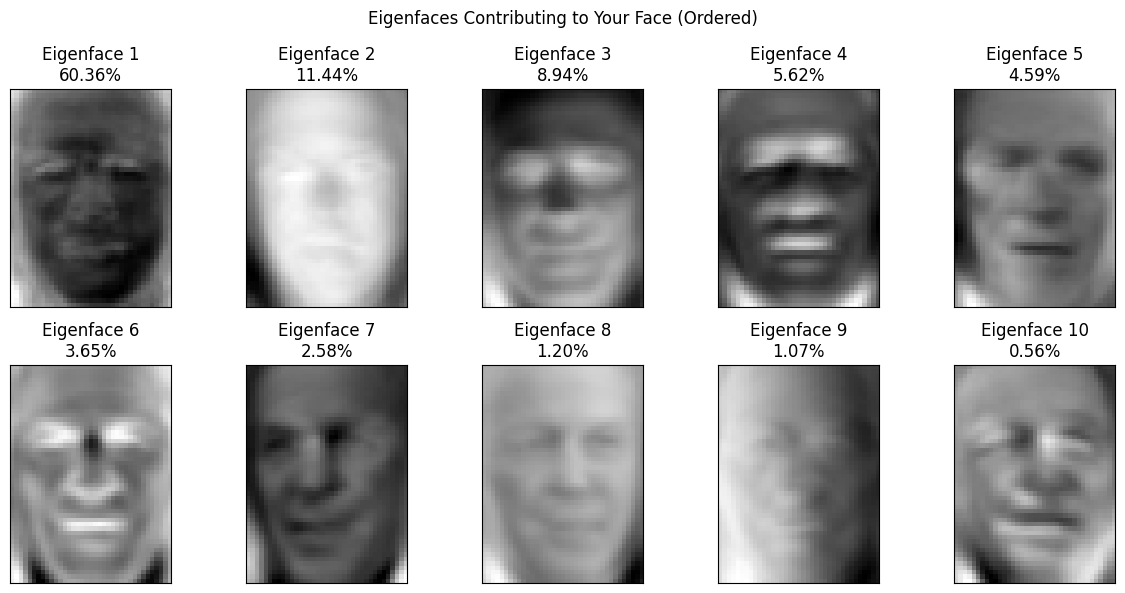

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA

# Load the labeled faces in the wild dataset
lfw_dataset = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
faces = lfw_dataset.images
target_labels = lfw_dataset.target
target_names = lfw_dataset.target_names
pca = PCA(n_components=10)  
pca.fit(faces.reshape(len(faces), -1))

your_face_path = "/content/Maths_for_MachineLearning/eigenface_picture.jpeg"

your_face = Image.open(your_face_path).convert('L')  # Open and convert to grayscale
your_face = np.array(your_face.resize((faces.shape[2], faces.shape[1])))  

# Perform PCA on your face
your_face_pca = pca.transform(your_face.reshape(1, -1))
eigenfaces = pca.components_.reshape((10, faces.shape[1], faces.shape[2]))
contrib_percentages = np.abs(your_face_pca) / np.sum(np.abs(your_face_pca)) * 100
sorted_indices = np.argsort(contrib_percentages)[0][::-1]
eigenfaces_sorted = eigenfaces[sorted_indices]
contrib_percentages_sorted = contrib_percentages[0][sorted_indices]

# Plot the ordered eigenfaces and their percentages
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle('Eigenfaces Contributing to Your Face (Ordered)')

for i, ax in enumerate(axes.flat):
    ax.imshow(eigenfaces_sorted[i], cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Eigenface {i+1}\n{contrib_percentages_sorted[i]:.2f}%')

plt.tight_layout()
plt.show()
